In [1]:
# Stock price over time
# Daily return on average
# Moving average
# Correlation between stocks closing price
# Correlation of daily returns
# Risk on one stock
# Predicting futur behavior

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

In [3]:
stock_list = ['DATA','AAPL','GOOG','MSFT','AMZN','BBD','YHOO']

In [4]:
end = datetime.now()
# A year ago
start = datetime(end.year -1,end.month,end.day)

In [5]:
# grab information from yahoo finance
# we use globals to make the information global variables
for stock in stock_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

IOError: after 3 tries, Yahoo! did not return a 200 for url 'http://ichart.finance.yahoo.com/table.csv?s=DATA&a=8&b=24&c=2014&d=8&e=24&f=2015&g=d&ignore=.csv'

In [6]:
# lets play with apple AAPL
AAPL.describe()
# Ajusted close price is what we like to work with

NameError: name 'AAPL' is not defined

In [34]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-09-15 to 2015-09-14
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


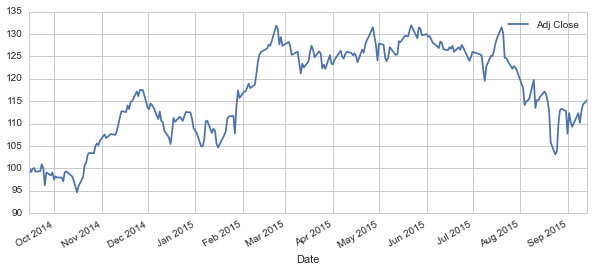

In [35]:
# one year close price of AAPL stock
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

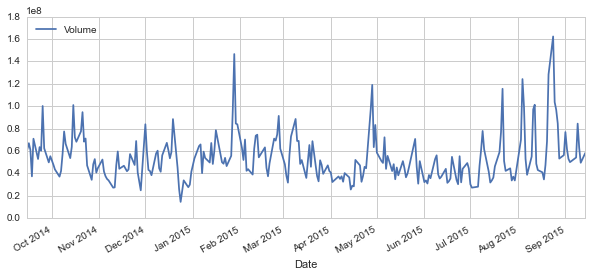

In [36]:
# Volume over one year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [37]:
# moving average links, smoothing or resistance level indicator. so data is not sharply mooving. can be 1-5-20-200 day moving avg
# For more info on the moving average check out the following links:
# 1.) http://www.investopedia.com/terms/m/movingaverage.asp
# 2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [38]:
# let calculate a few moving averages
ma_day = [10,20,50]
for ma in ma_day:
    # naming the columns
    column_name = 'MA for %s days' %(str(ma))
    # adding columns to the DataFrame
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

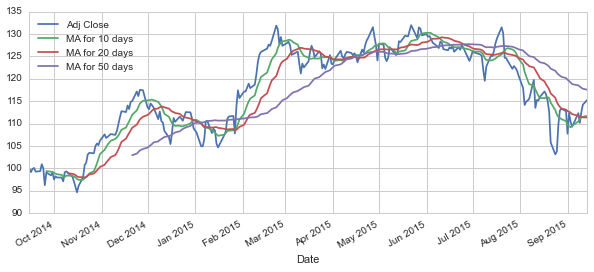

In [39]:
# we can clearly see the large range means the less choppiness
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

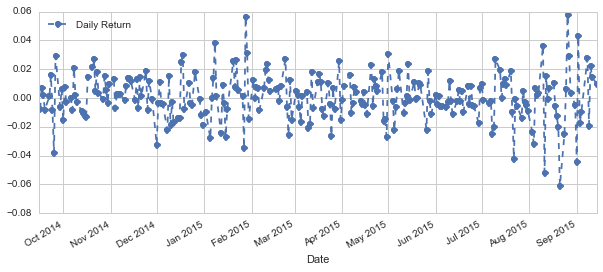

In [40]:
# user pandas to get daily returns
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

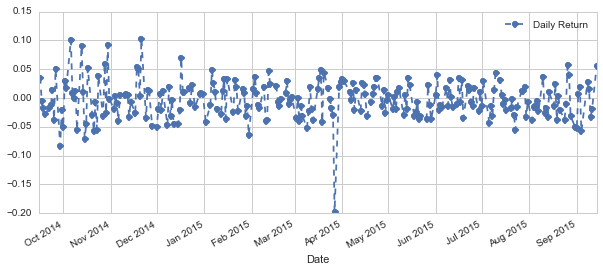

In [41]:
BBD['Daily Return'] = BBD['Adj Close'].pct_change()
BBD['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

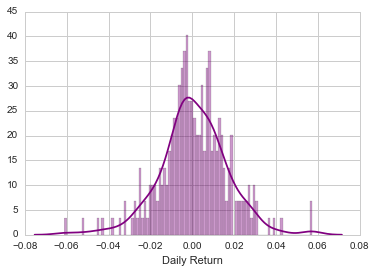

In [42]:
# average daily return in histogram and kde plot
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color = 'purple')

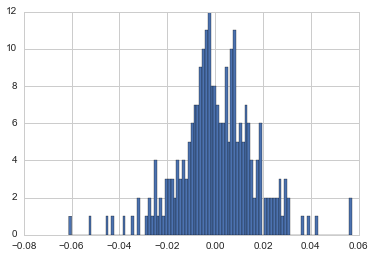

In [43]:
# also use pandas built in histogram
AAPL['Daily Return'].hist(bins=100)

In [44]:
# closing prices
closing_df = DataReader(stock_list,'yahoo',start,end)['Adj Close']
closing_df.head()

,AAPL,AMZN,BBD,DATA,GOOG,MSFT,YHOO
Date,,,,,,,
2014-09-15,99.921864,323.890015,15.636905,71.370003,573.102555,45.033913,42.549999
2014-09-16,99.164809,327.760010,16.185737,73.389999,579.952640,45.540346,42.709999
2014-09-17,99.872708,324.000000,16.089450,73.000000,584.772683,45.306609,42.590000
2014-09-18,100.079178,325.000000,15.810221,72.040001,589.272695,45.462435,42.090000
2014-09-19,99.263126,331.320007,15.376932,73.260002,596.082692,46.280525,40.930000


In [45]:
# get daily return for all stocks
stock_returns = closing_df.pct_change()
stock_returns.head()

,AAPL,AMZN,BBD,DATA,GOOG,MSFT,YHOO
Date,,,,,,,
2014-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-16,-0.007576,0.011948,0.035099,0.028303,0.011953,0.011246,0.00376
2014-09-17,0.007139,-0.011472,-0.005949,-0.005314,0.008311,-0.005133,-0.00281
2014-09-18,0.002067,0.003086,-0.017355,-0.013151,0.007695,0.003439,-0.01174
2014-09-19,-0.008154,0.019446,-0.027406,0.016935,0.011557,0.017995,-0.02756


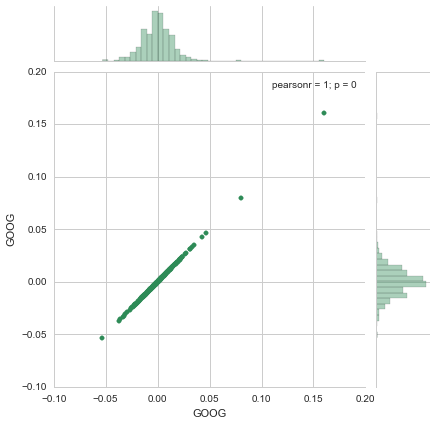

In [46]:
# now check the daily returns for correlation
# start by comparing google to itself. should be 1 correlation
sns.jointplot('GOOG','GOOG',stock_returns,kind = 'scatter', color = 'seagreen')

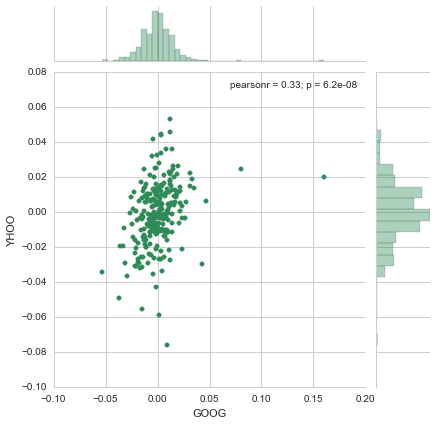

In [47]:
sns.jointplot('GOOG','YHOO',stock_returns,kind = 'scatter', color = 'seagreen')

In [109]:
# think about lagging correlation when thinking about predictions!!!!

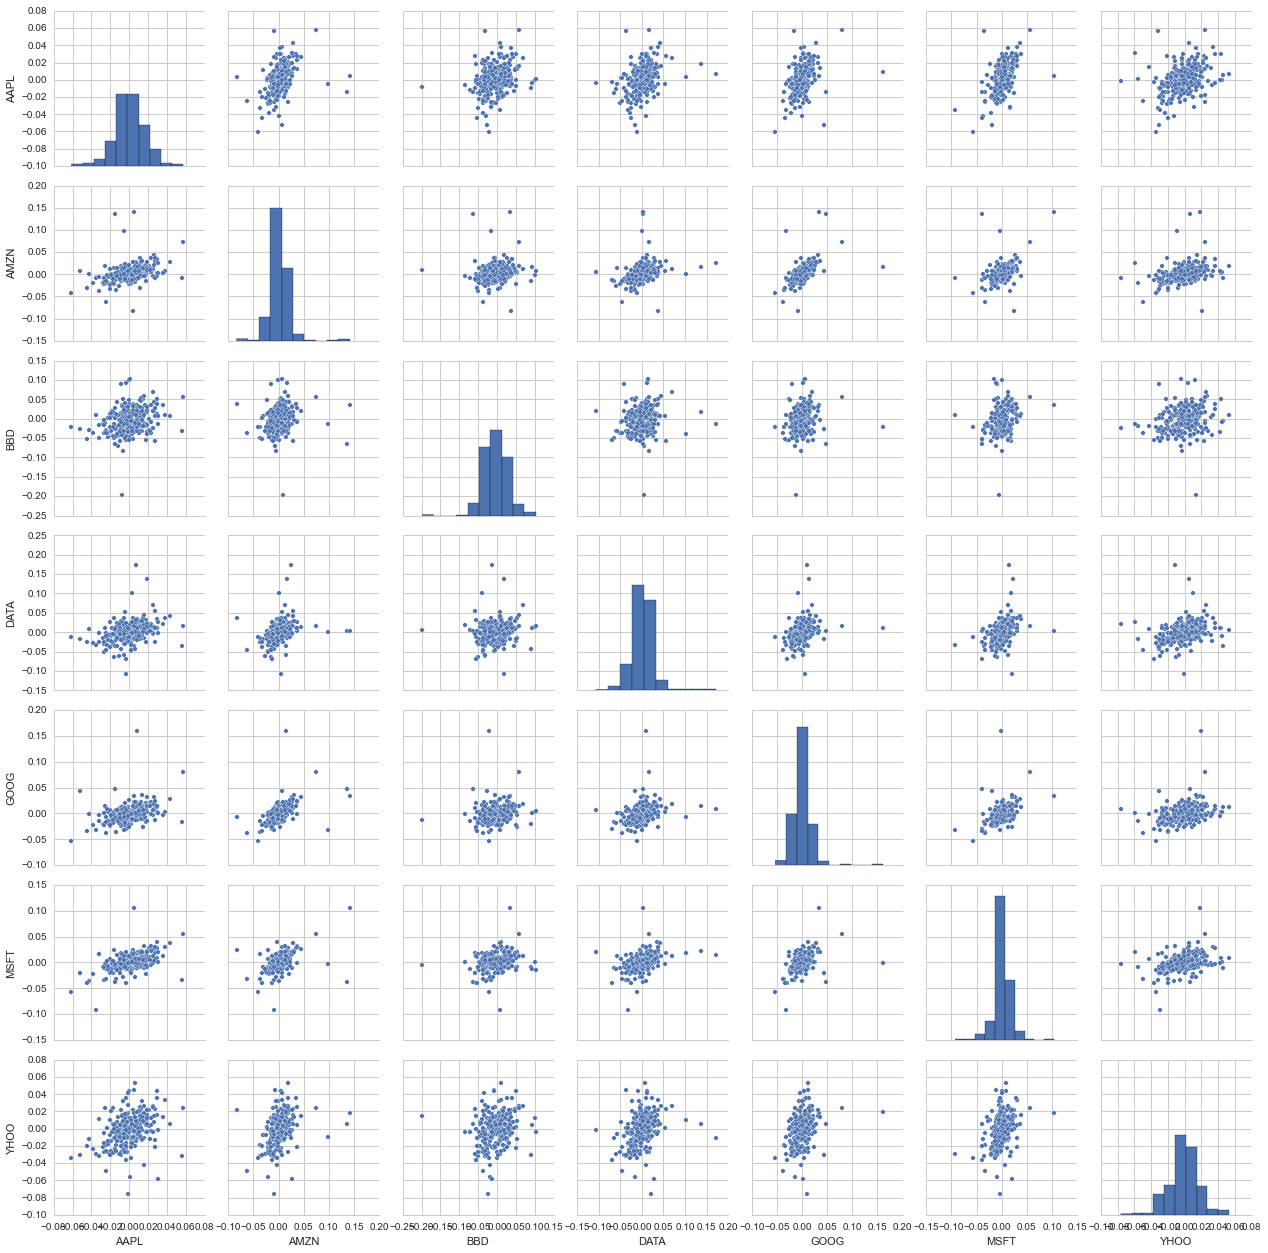

In [110]:
# pairplot on seaborn. Coorelative stocks!
sns.pairplot(stock_returns.dropna())

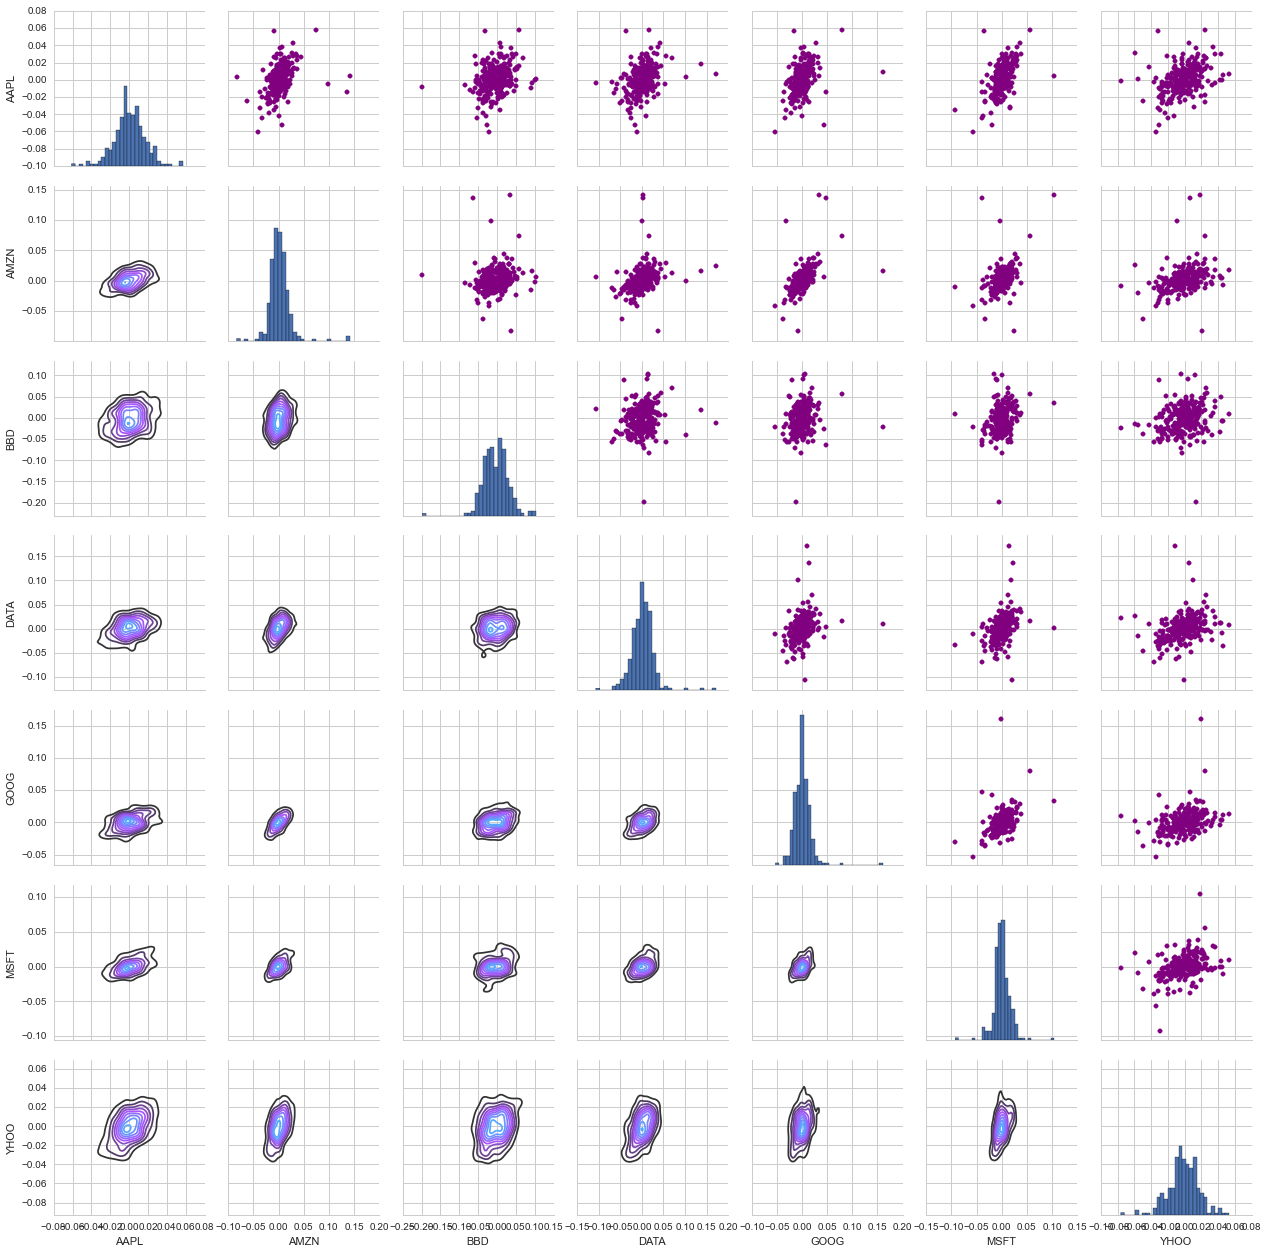

In [111]:
# equivalent of pair plot, but with more configurations
returns_fig = sns.PairGrid(stock_returns.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

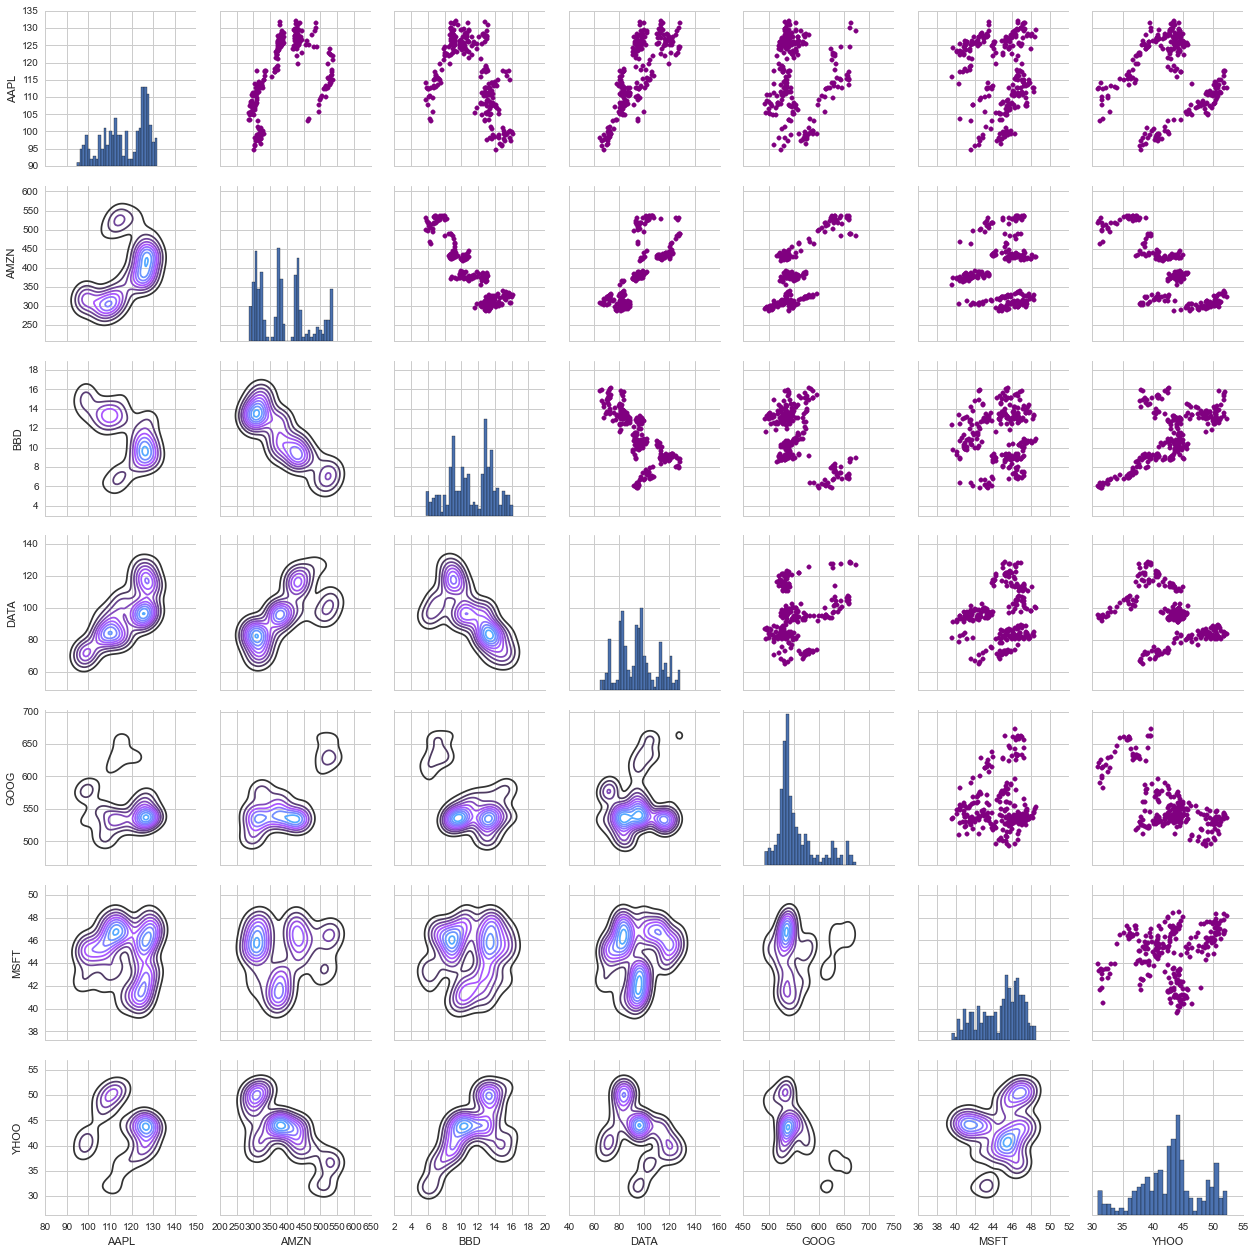

In [112]:
# equivalent of pair plot, but with more configurations
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

/home/efelnic/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/efelnic/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


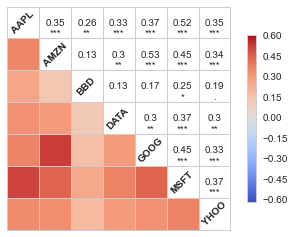

In [48]:
# All tech companies are positively correlated
sns.corrplot(stock_returns.dropna(),annot=True)

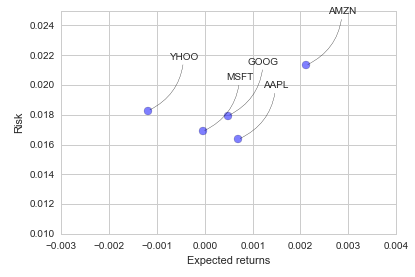

In [49]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = stock_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [50]:
stock_returns.head(10)

,AAPL,AMZN,BBD,DATA,GOOG,MSFT,YHOO
Date,,,,,,,
2014-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-16,-0.007576,0.011948,0.035099,0.028303,0.011953,0.011246,0.003760
2014-09-17,0.007139,-0.011472,-0.005949,-0.005314,0.008311,-0.005133,-0.002810
2014-09-18,0.002067,0.003086,-0.017355,-0.013151,0.007695,0.003439,-0.011740
2014-09-19,-0.008154,0.019446,-0.027406,0.016935,0.011557,0.017995,-0.027560
2014-09-22,0.000990,-0.020584,-0.018159,-0.016244,-0.014612,-0.009680,-0.055705
2014-09-23,0.015634,-0.002681,-0.011480,-0.016095,-0.010624,-0.010625,0.010349
2014-09-24,-0.008671,0.014152,0.014194,0.029756,0.011805,0.011168,0.021255
2014-09-25,-0.038133,-0.019134,-0.037532,-0.027937,-0.021990,-0.022090,-0.023320


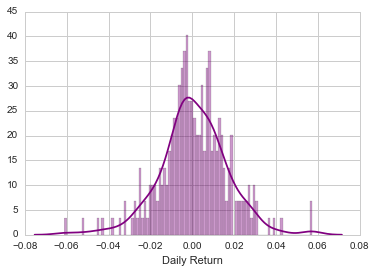

In [51]:
# daily return histogram
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [53]:
# Empirical quantile of daily returns, 95% confidence that 
# loss will not exces 2.5 percent
rets['AAPL'].quantile(0.05)

-0.025267665309060883

In [54]:
# set up timeframe
days = 365
# delta
dt = 1/days
# mu or drigt frome expected returns, average
mu = rets.mean()['GOOG']
# sigma or volatility of the stock, standard deviation
sigma = rets.std()['GOOG']

In [61]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

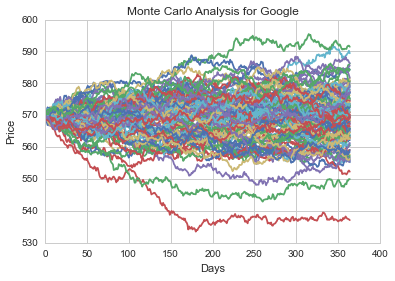

In [63]:
# Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')